# selective Search


### selective Search란?

- SS (이후부터 Selective Search를 간단하기 줄여서 SS로 표기)란 Uijlings와 Sande 등이 발표한 알고리즘으로 2013년 ILSVRC에 참여하여, 'detection' 분야에서 뉴욕대의 'Overfeat'방식을 누르고 1위를 차지하였다. 


- 이후 object detection 분야의 CNN으로 유명한 R-CNN, SPPNet, Fast R-CNN방식에 후보 영역을 추천에 사용이 되었고, R-CNN 및 R-CNN 개선 알고리즘들이 워낙 탁월한 성능을 보였기 때문에 같이 주목을 받게 되었다.


- 하지만, 후보 영역 추천 과정이 실제 객체 검출 CNN과 별도로 이루어지기 때문에, SS를 사용하면 진정한 의미에서 end-to-end 학습을 시키는 것도 불가능하고, 실시간 적용에도 어려움이 있다. 이후 Faster R-CNN, YOLO, FCN과 같은 방식들이 나오면서 후보 영역을 선정하는 부분이 CNN망으로 들어오거나 구조 자체의 변화가 생기면서, 한동안 hot하게 사용이 되다가 다시 주춤해진 상태이다.

### Selective Search의 목표

- SS란 객체 인식이나 검출을 위한 가능한 후보영역을 알아낼 수 있는 방법을 제공하는 것을 목표로 한다.
- 물론 SS가 발표되기 이전에도 동일한 목표를 위한 논문들이 발표되었지만, SS가 기존에 발표되었던 다른 방식들보다 우수하다.


- SS가 주목한 부분은 exhaustive search 방식과 segmentation 방식을 결합하여 보다 뛰어난 후보 영역을 선정하는 것이다. 
- exhaustive search는 그 이름이 의미하듯 후보가 될 만한 모든 영역을 샅샅이 조사하는 방식을 말한다. 후보가 될만한 대상의 크기(scale)가 일정하지도 않고, 또한 가로/세로 비율(aspect ratio)도 일정하지 않은 상황에서 모두 찾는 것은 연산시간 관점에서는 수용이 불가능하다.



- segmentation 방법은 exhaustive search와 같이 영상의 특성을 고려하지 않고 찾는 것이 아니라, 이전 방법론에서 살펴본 것과 같이 영상 데이터의 특성에 기반하는 방식이다. 색상, 모야으 무늬 등 다양한 기준에 따라 segmentation이 가능하지만, 모든 경우에 동일하게 적용할 수 있는 segmentation을 찾기란 불가능하다.

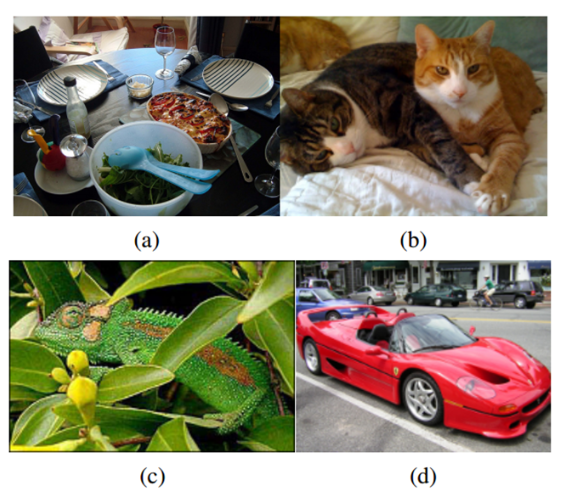

- 위 그림에서 (a)를 보면, 테이블 위에 샐러드 접시가 있고 샐러드 접시에는 샐러드 덜어먹을 때 쓰는 집게(tongs)가 있는 것과 같이 영상이 본질적으로 계층적임을 보여준다. 또한 테이블을 가리킬 때도 '아무것도 없는 것도 없는 나무 테이블만을 테이블이라고 할까, 아니면 테이블 위에 있는 모든 물체들까지 포함한 것을 테이블이라고 해야할까'는 고민거리다. (아래그림 참조)
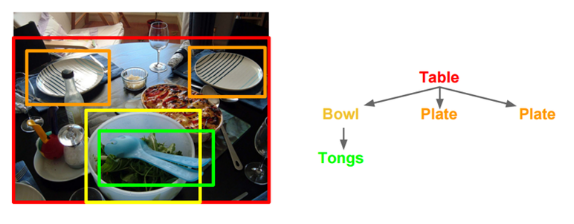

- 그림(b)는 무늬(texture)는 같지만, 색으로 고양이를 구별해야 하는 경우이고,
- (c)는 카멜레온과 나뭇잎을 색으로 구별하기는 어렵지만 무늬로 구별을 해야 하는 경우이며,
- (d)는 자동차 바퀴가 자동차의 본체와 색깔과 무늬가 다르지만 자동차에 있는 일부분이기 떄문에 자동차로 고려해줘야 한다.




- 사람은 구별하고자 하는 대상과 무늬, 크기, 색상 등이 달라도, 그리고 선험적인 지식(prior)이 없더라도 0.1초도 걸리지 않고 기가 막히게 유의미한 객체로 분리(semantic segmentation)하여 인지할 수 있다.
- 하지만 안타깝게도 아직까지 발표된 어떤 이론도 이러한 기준을 만족시키는 방법은 없다. 아직은 어떤 원리로 사람이 이렇게 인지하는지 정확하게 파악이 되지 않았기 때문일 수도 있다.




- SS는 exhaustive search와 같은 무식한 방법으로 후보 영역을 선정하는 대신에, 비록 segmentation 방법이 한계는 있지만, segmentation에 동원이 가능한 다양한 모든 방법을 활용하여 seed를 설정하고, 그 seed에 대하여 exhaustive한 방식으로 찾는 것을 목표로 하고 있다. 
- 논문에서는 이것을 segmentation 방법을 가이드로 사용한 data-driven SS라고 부른다.



- 아래 그림은 그 과정을 보여주는 것이다.
- 입력 영상에 대하여 segmentation을 실시하면, 윗줄의 왼쪽에 해당하며, 이것을 기반으로 후보영역을 찾기위한 seed를 설정한다.
- 그러면 아랫줄의 왼쪽에 해당하는 것처럼, 엄청나게 많은 후보가 만들어지게 되며, 이것을 적절한 기법으로 통합을 해나가면, segmentation은 윗줄 오른쪽과 같은 형태로 바뀌게 되며, 결과적으로 그것을 바탕으로 후보 영역이 통합되면서 개수가 줄어들게 된다.




- 이 과정은 이전에 canny 엣지 검출기에서 최대가 아닌 자잘한 엣지들을 없앨때 사용했던 non-maximum suppression이나 region growing과 같은 기법들을 떠올리면 도움이 될 것 같다.

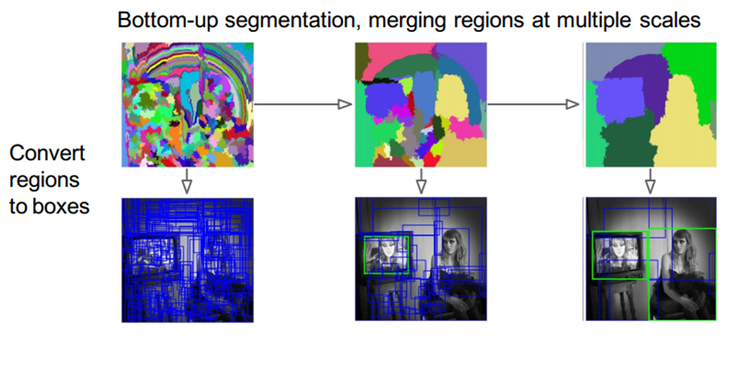

- 종합하면, SS의 목표는 아래 3가지로 요약이 가능하다.
    - 영상은 계층적 구조를 가지므로 적절한 알고리즘을 사용하여, 크기에 상관없이 대상을 찾아낸다.
    
    - 컬러, 무늬, 명암 등 다양한 그룹화 기준을 고려한다.
     
    - 빨라야한다.
    
- 영상에 존재한 객체의 크기가 작은 것부터 큰 것까지 모두 포함이 되도록 작은 영역부터 큰 영역까지 계층 구조를 파악할 수 있는 bottom-up 그룹화 방법을 사용한다.

### Selective Search의 3단계 과정

- 1. 일단 초기 <span class="mark">sub-segmentation</span>을 수행한다.
    - 각각의 객체가 1개의 영역에 할당이 될 수 있도록 많은 초기 영역을 생성하며, 아래 그림과 같다.
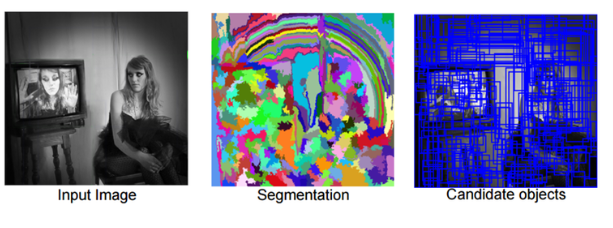

- 2. 작은 영역을 반복적으로 큰 영역으로 통합한다.
    - 이때는 '탐욕(greedy)'알고리즘을 사용하며, 그 방법은 다음과 같다. 우선 여러 영역으로부터 가장 비슷한 영역을 고르고, 이것을 좀 더 큰 영역으로 통합하며, 이 과정을 1개의 영역이 남을때까지 반복을 한다.
    
    - 아래 그림은 그 예를 보여주며, 초기에 작고 복잡했던 영역들이 유사도에 따라 점점 통합이 되는 것을 확인할 수 있다.
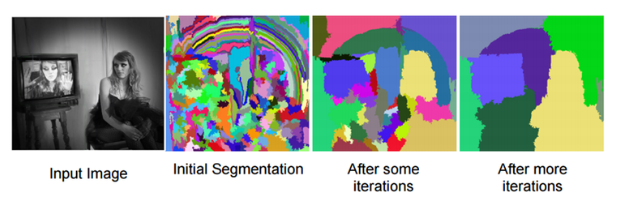    

- 3. 통합된 영역들을 바탕으로 후보 영역을 만들어 낸다.
    - 이 과정을 통합적으로 보여주는 과정은 아래와 같다.
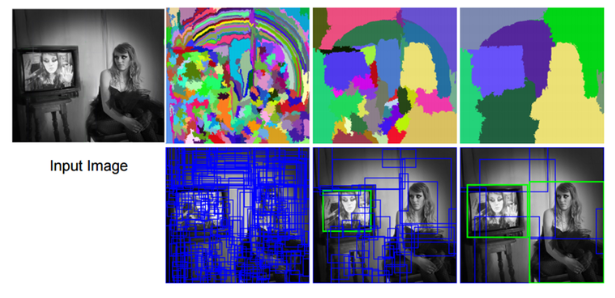    

## sub-segmentation (feat- Felzenszwalb)
- 영상 속의 물체가 겹쳐 있을 수 있기 때문에, 후보 영역을 정할 때는 이것을 고려한 계층적인 그룹화가 정말 중요하다.
- 하지만 대부분의 segmentation알고리즘은 계층구조를 고려하는 것이 아니라, seed로 부터 비슷한 속성을 갖는 인접영역으로 확장하는 방식이기 때문에 bottom-up 성격이 강할 수 밖에 없다.


- SS는 segmentation을 후보 영역을 검출하기 위한 가이드로 사용하기 때문에 후보 영역의 선정이 정말 중요하기 때문에 segmentation 방법을 정할때 고민이 많았을 것 같다.


- 논문에서 선택한 방식은 Felzenszwalb와 Huttenlocher가 제안한 segmentation 방식을 사용하였는데, 이 방식은 비교적 간단하면서도 그 성능이 뛰어나다.




### Felzenszwalb 와 Huttenlocher의 segmentation 알고리즘

Felzenszwalb는 '__인지적인 관점에서 의미 있는 부분을 모아서 그룹화__'와 '__연산량 관점에서 효율성 증대__'라는 2개의 목표를 기반으로 새로운 segmentation기법을 개발하였다. 물론 기존에도 '의미있는 부분을 모아서 segmentation' 하는 기법들이 있기는 했지만, 연산량 관점에서는 매력적이지 않았다.



- 이 논문에서 아래 그림 (a)와 같은 합성 이미지를 이용해 segmentation을 수행하는데, 만약에 사람이 인지하는 방식으로 제대로 segmentation을 수행한다면 그림 (b)와 같이 크게 3개의 영역으로 나뉘어져야 한다.

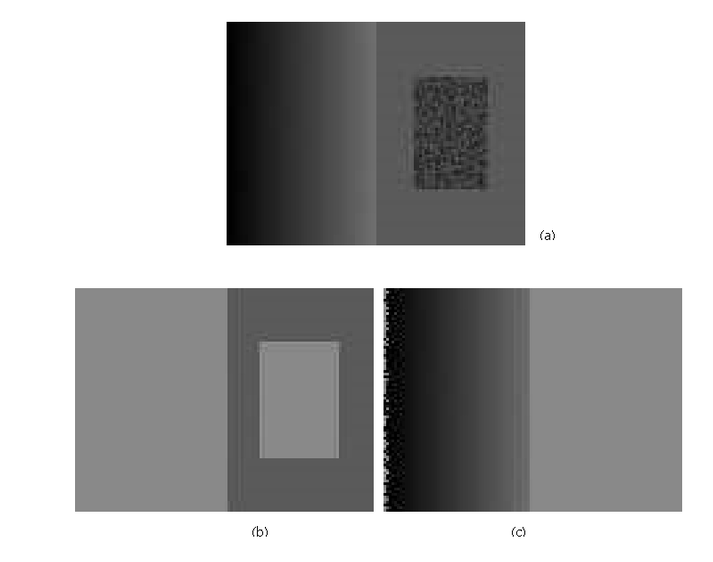

- 그림 (a)를 보면 왼쪽 부분은 밝기가 조금씩 변하기 때문에 그림 (b)의 왼쪽과 같이 segmentation을 한다는 것이 쉽지 않다. 
- 또한 (a)의 오른쪽을 보면 바코드와 같은 형태가 있는데 이것을 여러개의 작은 영역으로 구분하지 않고 (b)의 오른쪽 그림처럼 1개의 영역으로 깔끔하게 구별하는 것 역시 기존 segmentation알고리즘으로 쉽지 않다.
- 그림 (c)는 사람이 하는 것처럼 의미 있는 부분만 모아서 그룹화를 제대로 시키지 못한 경우를 보여준다.



- 논문에서는 사람이 인지하는 방식으로의 segmentation을 위해 graph방식을 사용하였다.
- 그래프 이론 G = (V,E)에서 V는 노드(virtex)를 나타내는데, 여기서 픽셀이 바로 노드가 된다. 
- 여기서 V는 꼭지점, E는 간선(변)을 의미한다.



- 기본적으로 이 방식에서는 픽셀들 간의 위치에 기반하여 가중치(w)를 정하기 때문에 __"grid graph 가중치"__방식이라고 부르며, 가중치는 아래와 같은 수식으로 결정이 되고 graph는 상하좌우 연결된 픽셀에 대하여 만든다.

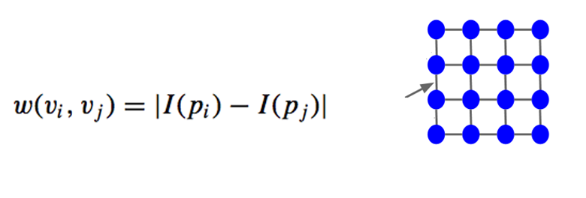

- E(edge)는 픽셀과 픽셀의 관계를 나타내며 가중치 $W(v_i,v_j)$로 표현이 되는데, 위 식에서 알 수 있듯이 가중치는 픽셀간의 유사도가 떨어질수록 큰 값을 갖게 되며, 결과적으로 w값이 커지게 되면 영역의 분리가 일어나게 된다.
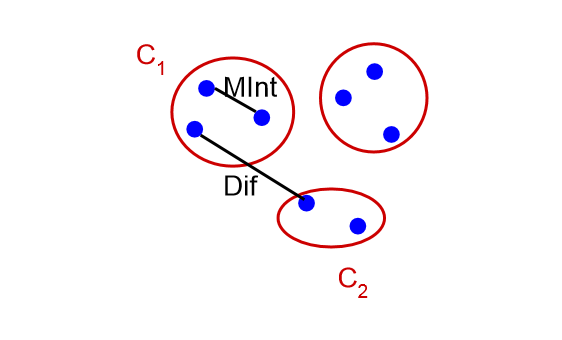

- 위 그림과 같이 C1과 C2가 있는 경우에, 영역을 분리할 것인지 혹은 통합할 것인지를 판단하는 아래와 같은 수식을 사용한다.
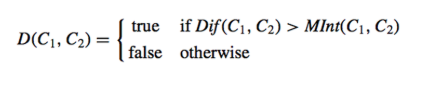


- 위 식에서 Dif(C1, C2)는 두개의 그룹을 연결하는 변의 최소 가중치를 나타내고, Mint(C1,C2)는 C1과 C2 그룹에서 최대 가중치 중 작은 것을 선택한 것이다.
- 즉, 그룹간의 차가 그룹 내의 차보다 큰 경우는 별개의 그룹으로 그대로 있고, 그렇지 않은 경우에는 병합을 하는 방식이다.


- 이렇게 비교적 간단한 알고리즘으로 segmentation을 수행했음에도 불구하고 아래 그림과 같이 양호한 결과를 얻을 수 있다. 운동장의 잔디 부분의 픽셀값들이 변화가 꽤 있음에도 불구하고 같은 영역으로 처리하는 것을 확인 할 수 있다. 물론 담장 부분 역시 운동장으로 처리되는 오류가 있기도 하다.
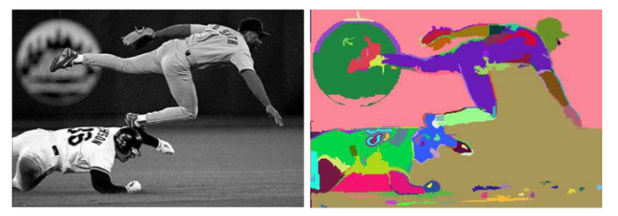

- 논문에서 인접한 픽셀끼리, 즉 공간적 위치 관계를 따지는 방법 분만 아니라 feature space에서 인접도를 고려한 방식도 제안을 하였다.
- 이방식은 '__nearest neighbor graph 가중치__" 방식이라고 부르며, 적정한 연산시간을 유지하기 위해 feature space에서 가장 가까운 10개의 픽셀에 한하여 graph를 형성한다.


- 이를 위해 모든 픽셀을 (x,y,r,g,b)로 정의된 feature space로 투영을 하여 사용하는데, (x,y)는 픽셀의 좌표이고 (r,g,b)는 픽셀의 컬러 값이다.
- 가중치에 대한 설정은 5개 성분에 대한 Euclidean distance를 사용하였다.
- 그룹화 방식은 동일하다.


- 아래 그림은 합성 이미지에 대하여 feature space방식을 사용하여 segmentation을 실시한 경우이다.
- 배경에 잡음이 많이 있음에도 불구하고 같은 영역으로 통합이 되는 것을 확인할 수 있다.
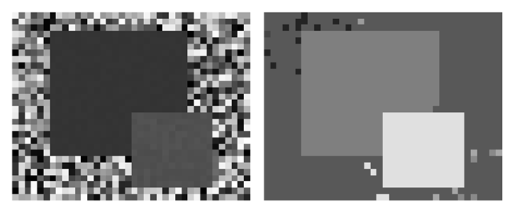

- 아래 그림은 feature space 방식을 사용하여 segmentation을 실시했을 때 아주 좋은 결과를 얻을 수 있는 대표적인 예를 보여준다. 
- 왼쪽의 경우, 구름이 있음에도 불구하고 하늘이 거의 같은 영역으로 묶이고, 잔디의 경우도 상당한 변화가 있음에도 불구하고 동일 영역으로 묶이는 것을 확인할 수 있다.
- 오른쪽 에펠탑 역시 중간 밝은 노란색 불이 영역을 나누고 있기 때문에 기존 segmentation 방법으로는 에펠탑을 같은 대상으로 처리하기가 어렵지만, 본 논문의 방식을 사용하면 오른쪽과 같은 좋은 결과를 얻을 수 있다.
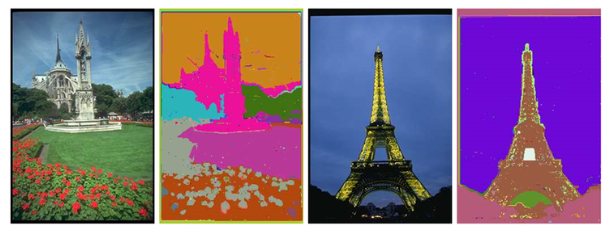

Felzenszwalb의 segmentation 알고리즘은 앞서 살펴본 것처럼 결과가 비교적 좋고 연산 속도가 매우 빨라 Selective Search의 3단계 과정 첫번째 단계에 적용이 되었다. 이 논문의 방식은 절대적이거나 완벽하지는 않지만, SS에서는 객체 검출을 위한 guide로 사용을 하기 때문에 그 관점에서 보면 적당한 알고리즘인 것 같다.

- 아주 정교한 segmentation이 아니더라도 상관없다. 왜냐하면, SS를 사용하여 후보 영역을 찾은 다음에 사용하는 분류기에서(본 논문은 SVM을 분류기로 사용, R-CNN에서는 AlexNet을 기본 신경망으로 사용) 정확한 판단을 하면 되기 때문이다.

- Felzenszwalb의 그래프 기반의 segmentation을 수행하고 나면, 자연 영상에서 많은 영역이 도출이 되는데, 영상이 갖고 있는 계층 구조적인 특성에 맞게 적절한 후보 영역을 찾아내려면, 1단계 sub-segmentation에서 만들어진 여러 영역들을 합치는 과정을 거쳐야 한다.
- SS에서는 여기에 유사도를 기반으로 한 greedy알고리즘을 적용하였다.

### Hierarchical Grouping
- 앞서 설명한 것처럼, Felzenszwalb의 segmentation 방법을 사용하면, 아래 그림처럼 많은 작은 영역들이 만들어지게 된다.
- 다른 scale에 있는 중요한 객체 후보들을 찾아내려면, 작은 영역들을 병합시키는 작업을 해줘야 한다.
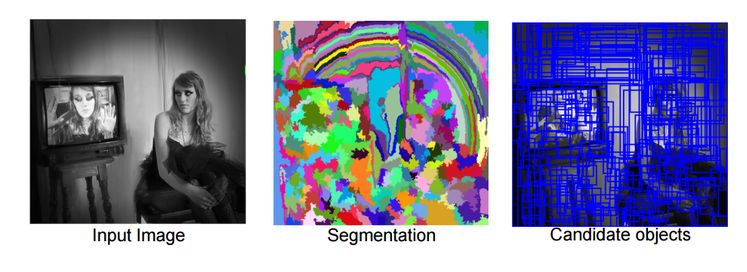

- 영역 병합에는 아래와 같이 단순한 greedy 알고리즘을 사용한다. 
- 먼저 segmentation을 통하여 초기 영역을 설정해준다.
- 그 후 인접하는 모든 영역들 간의 유사도를 구한다.
- 전체 영상에 대하여 유사도를 구한 후, 가장 높은 유사도를 갖는 2개의 영역을 병합시키고, 병합된 영역에 대하여 다시 유사도를 구한다.
- 새롭게 구해진 영역은 영역list에 추가를 한다
- 이 과정을 전체 영역이 1개의 영역으로 통합될 때까지 반복적으로 수행을 하고, 최종적으로는 R-리스트에 들어 있는 영역들에 대한 bounding box를 구하면 된다.



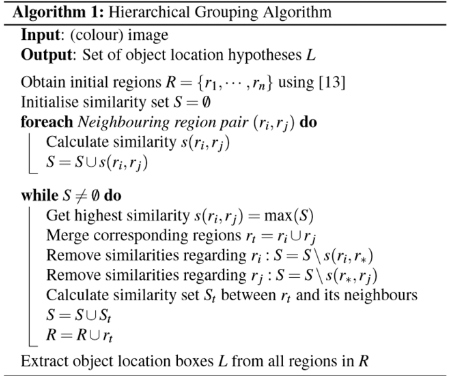

- 위 과정을 수행하게 되면, 아래 그림처럼, 영역이 통합이 되는 것을 확인할 수 있으며, 다양한 scale에 있는 후보들을 검출할 수 있게 된다.

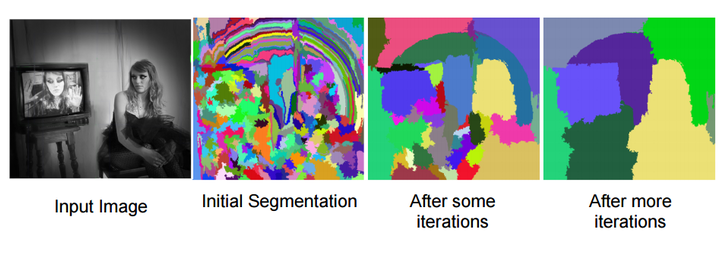

### 다양화 전략(Diversification Strategy)
- 후보 영역 추천의 성능 향상을 위해 SS에서는 다음과 같은 다양화 전략을 사용한다.
    - 다양한 컬러 공간을 사용
    - color, texture, size, fill등 4가지 척도를 적용하여 유사도를 구하기
    
#### 다양한 컬러 공간
- 다른 컬러 공간은 서로 다른 항상성(invariance)을 보인다. 그러므로 단순하게 RGB나 흑백 컬러 공간을 사용하는 대신에 8개의 서로 다른 컬러 공간을 사용하게 되면 특정 컬러 공간에서는 검출하지 못했던 후보 영역까지 검출이 가능하게 된다.
- 가령 RGB 컬러공간을 사용하는 경우는 그림자나 광원의 세기 변화 등으로 인한 조도 변화에 3개의 채널이 모두 영향을 받게 되지만, HSV(색상, 채도, 명도)컬러 공간을 사용하면 색상이나 채도는 밝기 변화에 거의 영향을 받지 않지만 명도는 영향을 받는다.
- 아래 표는 각각의 컬러 공간이 영향을 받는 수준을 평가한 것이다. 이 표에서 "-"는 영향을 받는 경우이고, "+"는 영향을 받지 않는 경우이며, "+/-"는 부분적으로 영향을 받는것을 나타낸다. 또한 1/3과 2/3는 3개의 컬러 채널에서 1개와 2개의 채널이 영향을 받지 않는다는 것을 나타낸다.

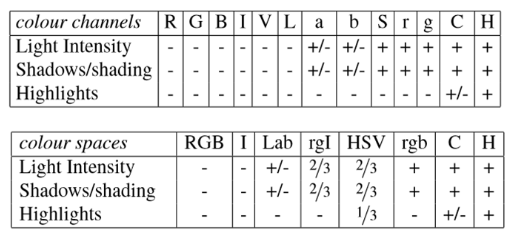

- 논문에서는 sub-segmentation과 영역을 병합하는 과정에서 서로다른 8개의 컬러 공간을 적용했다고 밝히고 있다.

#### 다양한 유사도 검사의 척도
- SS는 유사도 검사의 척도로 color, texture, size, fill을 사용을 하며, 유사도 결과는 모두 [0,1] 사이의 값을 갖도록 정규화(normalization)시킨다.

- 1) 컬러 유사도
    - 컬러 유사도 검사에는 히스토그램을 사용한다.
    - 각각의 컬러 채널에 대하여 bin을 25로 하며, 히스토그램은 정규화 시킨다.
    - 각각의 영역들에 대한 모든 히스토그램을 구한 후 인접한 영역의 히스토그램의 교집합 구하는 방식으로 유사도를 구하며, 식은 아래와 같다.
    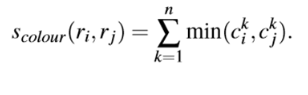

- 2) texture 유사도
    - object matching에서 뛰어난 성능을 보이는 SIFT(Scale Invariant Feature Transform)와 비슷한 방식을 사용하여 히스토 그램을 구한다.
    - 8방향의 가우시안 미분값을 구하고 그것을 bin을 10으로 하여 히스토그램을 만든다.
    - SIFT는 128차원의 디스크립터 벡터를 사용하지만, 여기서는 80차원의 디스크립터 벡터를 사용하며, 컬러의 경우는 3개의 채널이 있기 때문에 총 240차원의 벡터가 만들어진다.
    - 컬러 유사도의 히스토그램과 마찬가지로 히스토그램에 대하여 정규화를 수행하며, 영역간의 유사도는 컬러 유사도와 마찬가지 방식을 사용한다.
    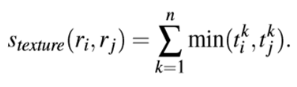

- 3) 크기 유사도
    - 작은 영역들을 합쳐서 큰 영역을 만들 떄, 다른 유사도만 따지만 1개 영역이 다른 영역들을 차례로 병합을 하면서 영역들의 크기 차이가 나게 된다.
    - 크기 유사도는 작은 영역부터 먼저 합병이 되도록 해주는 역할을 한다. 일종의 가이드 역할을 하게 되는 것이다.
    
    - 아래 수식을 보면 명확해진다. size(im)은 전체 영역에 있는 픽셀 수 이고, size($r_i$)와 size($r_j$)는 유사도를 따지는 영역의 크기(픽셀 수)이다.
    - 영역의 크기가 작을수록 유사도가 높게 나오기 때문에, 다른 유사도가 모두 비슷한 수준이라면 크기가 작은 비슷한 영역부터 먼저 합병이 된다.
    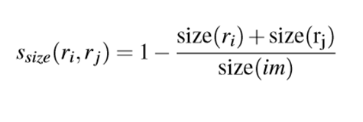

- 4) fill 유사도
    - 2개의 영역을 결합할때 얼마나 잘 결합이 되었는지를 나타낸다. fill이라는 용어가 붙은 이유는 2개의 영역을 합칠때 gap이 작아지는 방향으로 유도를 하기 위함이다.
    - 가령 1개의 영역이 다른 영역에 완전히 포함이 되어 있는 형태라고 한다면, 그것부터 합병을 시켜야 hole이 만들어 지는것을 피할 수 있게 된다.
    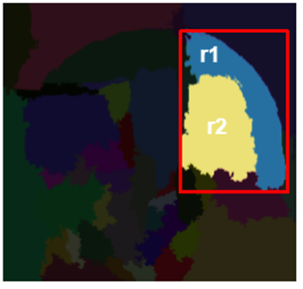
    


- 위 그림에서 r1과 r2를 합쳤을 경우 r1과 r2를 합친 빨간색의 bounding box 영역($BB_ij$)의 크기에서 r1과 r2영역의 크기를 뺐을때 작은 값이 나올수록 2영역의 결합성(fit)이 좋아지게 된다.
- fill 유사도는 이런 방향으로 합병을 유도하기 위한 척도하고 보면 된다.
- 아래 수식을 보면 명확하게 알수 있다.
- Fit이 좋을수록 결과적으로 1에 근접한 값을 얻을수 있기 때문에 그 방향으로 합병이 일어나게 된다.
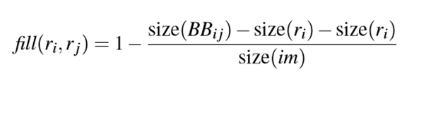

### 유사도를 사용하는 방식
- 이렇게 구한 4개의 유사도를 결합시켜서 사용을 하며, 수식은 아래와 같다.
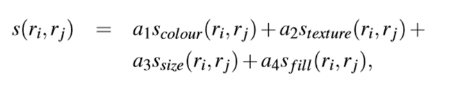

- 위 수식에서 $a_1 ~ a_4$는 해당 유사도를 사용할 것인지 말 것인지를 결정한다.

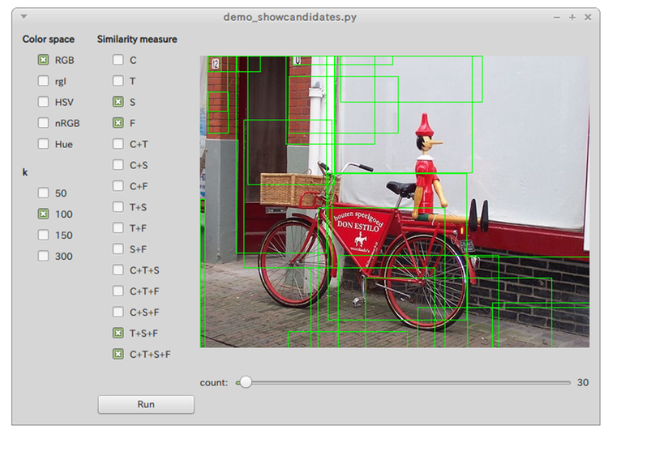